Importing all libraries

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
sns.set(style="whitegrid")

In [12]:
data = pd.read_csv(r'V:\SQL Projects\MCD\menu.csv',encoding = 'unicode_escape')
data.head(10)


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
5,Breakfast,Steak & Egg McMuffin,6.5 oz (185 g),430,210,23.0,36,9.0,46,1.0,...,31,10,4,18,3,26,15,2,30,20
6,Breakfast,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",5.3 oz (150 g),460,230,26.0,40,13.0,65,0.0,...,38,13,2,7,3,19,10,8,15,15
7,Breakfast,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",5.8 oz (164 g),520,270,30.0,47,14.0,68,0.0,...,43,14,3,12,4,19,15,8,20,20
8,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (R...",5.4 oz (153 g),410,180,20.0,32,11.0,56,0.0,...,36,12,2,7,3,20,2,8,15,10
9,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",5.9 oz (167 g),470,220,25.0,38,12.0,59,0.0,...,42,14,3,12,4,20,6,8,15,15


Data Cleaning


In [6]:
data.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

In [7]:
print(data.describe())

          Calories  Calories from Fat   Total Fat  Total Fat (% Daily Value)  \
count   260.000000         260.000000  260.000000                 260.000000   
mean    368.269231         127.096154   14.165385                  21.815385   
std     240.269886         127.875914   14.205998                  21.885199   
min       0.000000           0.000000    0.000000                   0.000000   
25%     210.000000          20.000000    2.375000                   3.750000   
50%     340.000000         100.000000   11.000000                  17.000000   
75%     500.000000         200.000000   22.250000                  35.000000   
max    1880.000000        1060.000000  118.000000                 182.000000   

       Saturated Fat  Saturated Fat (% Daily Value)   Trans Fat  Cholesterol  \
count     260.000000                     260.000000  260.000000   260.000000   
mean        6.007692                      29.965385    0.203846    54.942308   
std         5.321873                   

Average Calories in a McDonald's Value Meal 

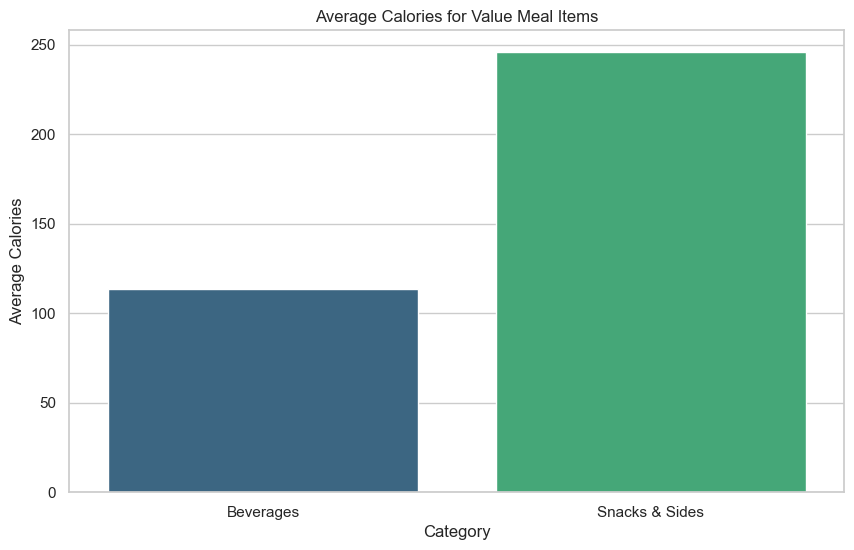

In [16]:
# Find typical value meal items (burgers, fries, and drinks)
value_meal_items = data[data['Category'].isin(['Burgers', 'Chicken & Fish Sandwiches', 'Snacks & Sides', 'Beverages'])]

# Calculate the average calories for each category
average_calories = value_meal_items.groupby('Category')['Calories'].mean().round(2)

# Plotting the average calories in a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=average_calories.index, y=average_calories.values, palette='viridis')
plt.title('Average Calories for Value Meal Items')
plt.xlabel('Category')
plt.ylabel('Average Calories')
plt.show()


 Caloric Contribution of Beverages 

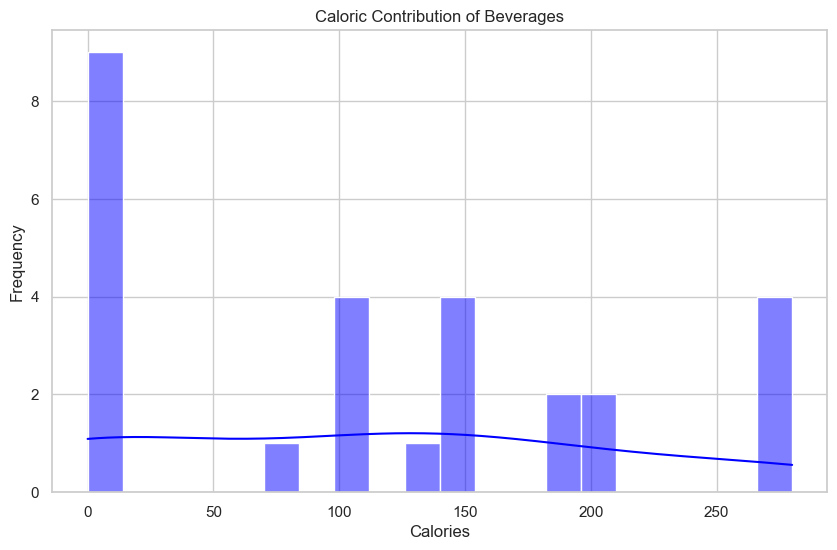

In [17]:
# Filter for Beverages
beverages = data[data['Category'] == 'Beverages']

# Plotting the distribution of beverage calories
plt.figure(figsize=(10, 6))
sns.histplot(beverages['Calories'], bins=20, kde=True, color='blue')
plt.title('Caloric Contribution of Beverages')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()


Nutritional Difference: Grilled Chicken vs. Crispy Chicken

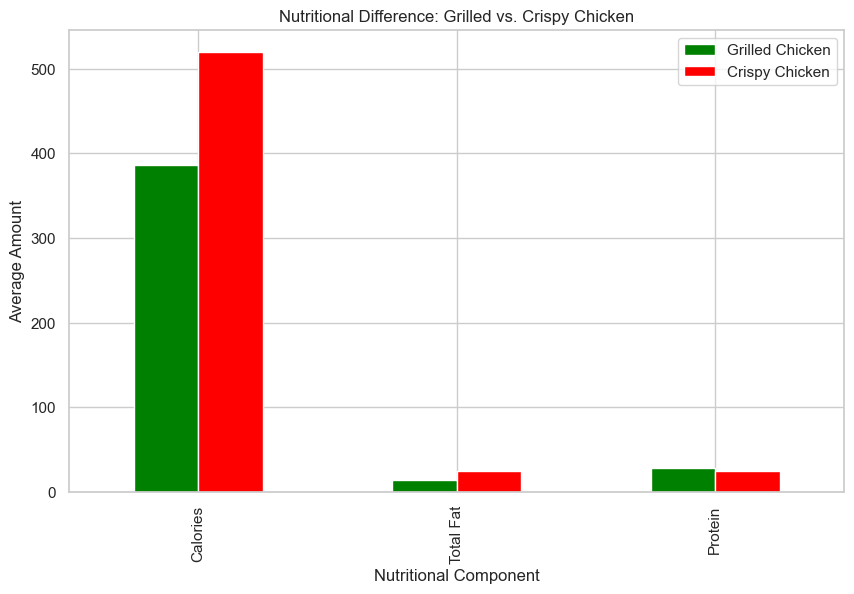

In [19]:
# Filter for grilled and crispy chicken items
grilled_chicken = data[data['Item'].str.contains('Grilled', case=False)]
crispy_chicken = data[data['Item'].str.contains('Crispy', case=False)]

# Calculate average nutrition for grilled and crispy chicken
avg_nutrition = pd.DataFrame({
    'Grilled Chicken': grilled_chicken[['Calories', 'Total Fat', 'Protein']].mean().round(2),
    'Crispy Chicken': crispy_chicken[['Calories', 'Total Fat', 'Protein']].mean().round(2)
})

# Plotting the nutritional difference
avg_nutrition.plot(kind='bar', figsize=(10, 6), color=['green', 'red'])
plt.title('Nutritional Difference: Grilled vs. Crispy Chicken')
plt.xlabel('Nutritional Component')
plt.ylabel('Average Amount')
plt.show()


Nutritional Difference: Egg Whites vs. Whole Eggs

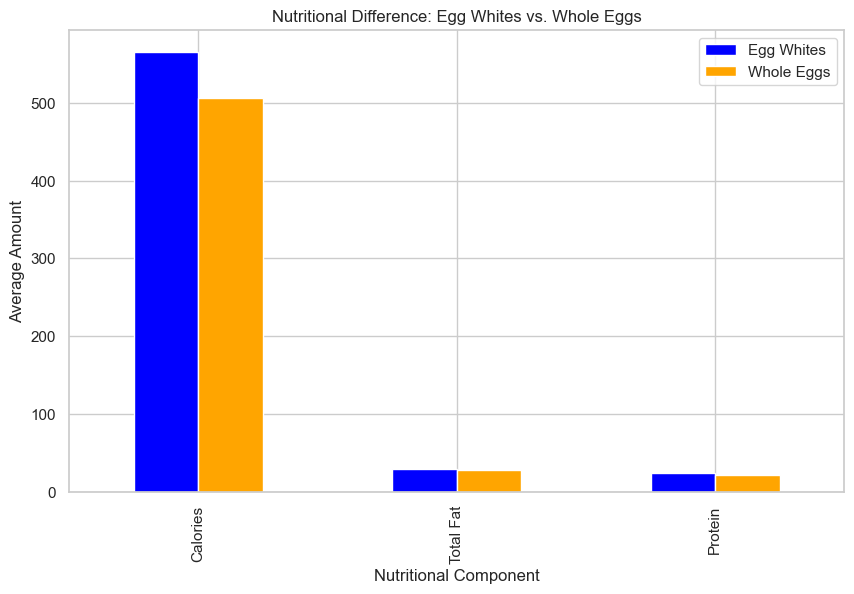

In [21]:
# Filter for items with egg whites and whole eggs
egg_whites = data[data['Item'].str.contains('Egg White', case=False)]
whole_eggs = data[data['Item'].str.contains('Egg', case=False) & ~data['Item'].str.contains('Egg White', case=False)]

# Calculate average nutrition for egg whites and whole eggs
avg_nutrition_eggs = pd.DataFrame({
    'Egg Whites': egg_whites[['Calories', 'Total Fat', 'Protein']].mean().round(2),
    'Whole Eggs': whole_eggs[['Calories', 'Total Fat', 'Protein']].mean().round(2)
})

# Plotting the nutritional difference
avg_nutrition_eggs.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])
plt.title('Nutritional Difference: Egg Whites vs. Whole Eggs')
plt.xlabel('Nutritional Component')
plt.ylabel('Average Amount')
plt.show()


 Least Number of Items to Meet One Day's Nutritional Requirements

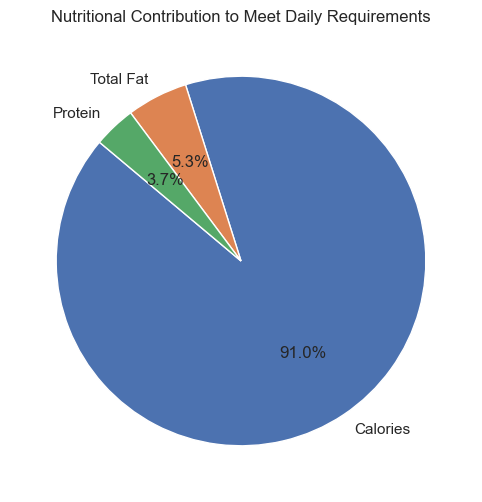

In [22]:
# Define daily nutritional requirements (based on a 2,000-calorie diet)
daily_requirements = {
    'Calories': 2000,
    'Total Fat': 70,   # grams
    'Protein': 50      # grams
}

# Sort menu items by calories to find items with high nutritional content
sorted_items = data.sort_values(by=['Calories'], ascending=False)

# Cumulative sum to find the least number of items
sorted_items['Cumulative Calories'] = sorted_items['Calories'].cumsum()
sorted_items['Cumulative Total Fat'] = sorted_items['Total Fat'].cumsum()
sorted_items['Cumulative Protein'] = sorted_items['Protein'].cumsum()

# Find the index where cumulative values meet or exceed daily requirements
sufficient_items = sorted_items[
    (sorted_items['Cumulative Calories'] >= daily_requirements['Calories']) &
    (sorted_items['Cumulative Total Fat'] >= daily_requirements['Total Fat']) &
    (sorted_items['Cumulative Protein'] >= daily_requirements['Protein'])
]

# Select the least number of items
least_items = sufficient_items.head(1)  # First occurrence that meets the requirements

# Plotting the least number of items to meet daily nutritional requirements
plt.figure(figsize=(10, 6))
plt.pie(least_items[['Cumulative Calories', 'Cumulative Total Fat', 'Cumulative Protein']].values[0],
        labels=['Calories', 'Total Fat', 'Protein'], autopct='%1.1f%%', startangle=140)
plt.title('Nutritional Contribution to Meet Daily Requirements')
plt.show()
